<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   neighborhood      61 non-null     object 
 1   flat              61 non-null     object 
 2   flatType          61 non-null     object 
 3   squareMeters      61 non-null     float64
 4   price             61 non-null     int64  
 5   pricePerSM        61 non-null     int64  
 6   constructionYear  61 non-null     int64  
 7   floorNumber       61 non-null     int64  
 8   elevator          61 non-null     object 
 9   condition         61 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.9+ KB


/opt/homebrew/Caskroom/miniforge/base/envs/data_science_env/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


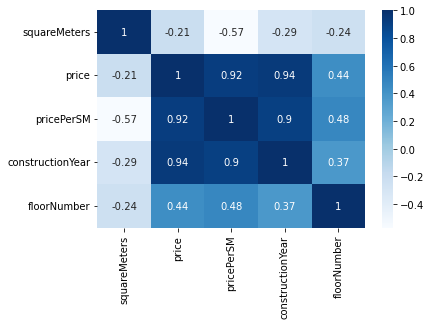

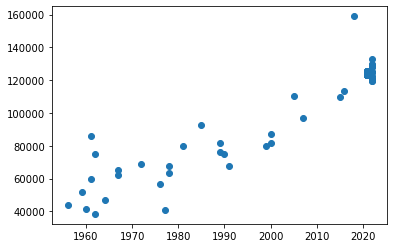

const              -2.539481e+06
constructionYear    1.317590e+03
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     453.2
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.98e-23
Time:                        10:01:46   Log-Likelihood:                -442.05
No. Observations:                  42   AIC:                             888.1
Df Residuals:                      40   BIC:                             891.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

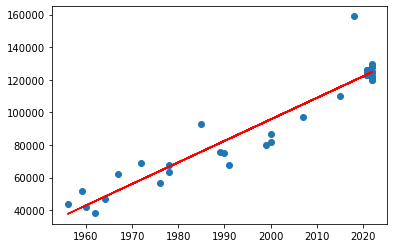

<Figure size 432x288 with 0 Axes>

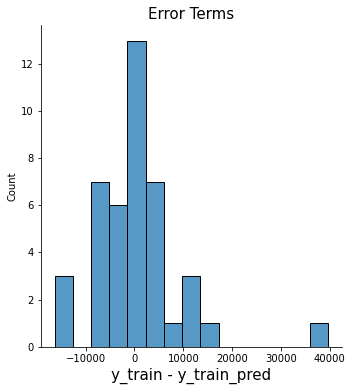

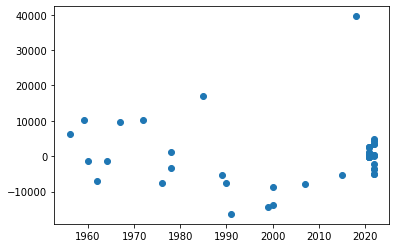

0.7246324193217983


'\nSince the r2 value for test data (0.724) differs more than 5% from the r2 value of the training data (0.919),\nthe model is not as accurate as it should be. When applyin \n\n\n\n'

In [12]:
""" #########################

SIMPLE LINEAR REGRESSION

    Predicts the relationship between two variables.

    Question:
    How I could predict the selling price using different variables?

    With the help of: https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4

######################### """


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score    


# Import csv-file from working directory and transform it to a dataframe
data = pd.DataFrame(pd.read_csv("housePrices.csv", sep="\;", decimal=","))


# Check if there are any null values
data.info()


# Create correlation matrix to review correlation between different variables
# Find the columns which are the most correlated to price
# Visualise the correlation matrix using the seaborn heatmap
corrMatrix = data.corr()
sn.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()


# Based on the correlation matrix, the construction year seems most correlated to price
# Visualise the data set
plt.scatter(data["constructionYear"], data["price"])
plt.show()


"""
Steps for linear regression
    1. Create x and y
    2. Create Train and Test set
    3. Train the model
    4. Evaluate the model
"""

# Equation for simple linear regression
# y = kx + b

# Create x and y
x = data["constructionYear"]
y = data["price"]


# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,
                                                            test_size = 0.3,
                                                            random_state = 100)


# Build and train the model using statsmodel package (add constant)
x_train_sm = sm.add_constant(x_train)


# Fit the regression line using Ordinary Least Square method (OLS)
lr = sm.OLS(y_train, x_train_sm).fit()

print(lr.params)

print(lr.summary())

"""
Summary:

1. coefficient for construction year is 1317.5897 and it's corresponde to P-value is almost 0
    > The coefficient is statistically significant
    > P-value should always be less for the coefficient to be significant

2. R-value is 0.919, so 91.9% of the price can be explained by the construction year

3. F-statistic has a low value, which means that the mode fit is statistically significant

Since the fit is significant > visualise how well the straight line fits the scatter plot (training data)

"""


# Visualise the regression line using the training data (just to check that the line makes sense)
plt.scatter(x_train, y_train)
plt.plot(x_train, -2.539481e+06 + 1.317590e+03 * x_train , "r")
plt.show()


# Evaluate the model and make the predictions using test data
# Residual analysis > make sure the terms are normally distributed

# Predict y_value using training data (y_train --> x_train)
y_train_pred = lr.predict(x_train_sm)


# Create residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)


# Plot the histogram of the residuals and check whether it looks like normal distribution or not
# The residuals seems to follow the normal distribution (there seem to be one outlier)
fig = plt.figure()
sn.displot(res, bins = 15)
plt.title("Error Terms", fontsize = 15)
plt.xlabel("y_train - y_train_pred", fontsize = 15)
plt.show()


# Make sure that the residuals are not following any specific pattern
# Since the residuals follow a normal distribution and don't follow any spesific pattern, we can use linear regression model to
# to evaluate test data
plt.scatter(x_train, res)
plt.show()


# PREDICTIONS TO THE TEST DATA
# Adding a constant to X_test using statsmodel
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to x_test_sm
y_test_pred = lr.predict(x_test_sm)
y_test_pred

r_squared = r2_score(y_test, y_test_pred)
print(r_squared)


"""
Since the r2 value for test data (0.724) differs more than 5% from the r2 value of the training data (0.919),
the model is not as accurate as it could be. That can be explained by the small data set and and also the split
between train and test data.

Even thought the r2 value for test data is lower, the construction year explains quit well the price of the apartment. 

"""

